
Usando el conjunto de datos disponible en:

https://www.kaggle.com/c/titanic


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import DistanceMetric




1. Obtenga un conjunto de entrenamiento limpiando los datos que ahí están provistos.

In [2]:
data = pd.read_csv("train.csv", sep=",") # Importar los datos
# Se eliminan las columnas de Ticket y Cabinas (tienen muchos valores nulos y no)
data = data.drop(['Ticket', 'Cabin','Name', 'Embarked'], axis=1)
print("- La dimension inicial del dataset es :",data.shape, "\n")

#Eliminar las filas con valores nulos o completarlos con la media de los existentes
data = data[data['PassengerId'].notna()]
data = data[data['Survived'].notna()]
data = data[data['Pclass'].notna()]
data = data[data['Sex'].notna()]
data = data[data['Age'].notna()]
data = data[data['Fare'].notna()]
data = data[data['Parch'].notna()]
data = data[data['SibSp'].notna()]

print("- Las nuevas dimensiones del conjunto de datos son: ",data.shape, "\n")

#Se procede a cambiar las variables
data.loc[data['Sex'] == 'male', 'Sex'] = '1'
data.loc[data['Sex'] == 'female', 'Sex'] = '0'
Xo = pd.DataFrame(data, columns = ['Sex','Pclass','Age','Fare', 'Parch','SibSp',])
print("- El nuevo conjunto de datos: ", "\n", Xo)
Y  = pd.DataFrame(data, columns = ['Survived'])


- La dimension inicial del dataset es : (891, 8) 

- Las nuevas dimensiones del conjunto de datos son:  (714, 8) 

- El nuevo conjunto de datos:  
     Sex  Pclass   Age     Fare  Parch  SibSp
0     1       3  22.0   7.2500      0      1
1     0       1  38.0  71.2833      0      1
2     0       3  26.0   7.9250      0      0
3     0       1  35.0  53.1000      0      1
4     1       3  35.0   8.0500      0      0
..   ..     ...   ...      ...    ...    ...
885   0       3  39.0  29.1250      5      0
886   1       2  27.0  13.0000      0      0
887   0       1  19.0  30.0000      0      0
889   1       1  26.0  30.0000      0      0
890   1       3  32.0   7.7500      0      0

[714 rows x 6 columns]


2. Normalice el conjunto de datos.

In [3]:
#scaler = StandardScaler()
#scaler.fit(Xo)

scaler = MinMaxScaler()
scaler.fit(Xo)

X = scaler.transform(Xo)
print(X, X.shape)

[[1.         1.         0.27117366 0.01415106 0.         0.2       ]
 [0.         0.         0.4722292  0.13913574 0.         0.2       ]
 [0.         1.         0.32143755 0.01546857 0.         0.        ]
 ...
 [0.         0.         0.23347575 0.0585561  0.         0.        ]
 [1.         0.         0.32143755 0.0585561  0.         0.        ]
 [1.         1.         0.39683338 0.01512699 0.         0.        ]] (714, 6)


3. Divida los datos en validación(20) y entrenamiento (80).




In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=0)
print(X_train)

[[0.         0.5        0.44709726 0.02537431 0.         0.        ]
 [1.         0.5        0.30887158 0.08115719 0.33333333 0.2       ]
 [1.         0.5        0.43453129 0.05074862 0.         0.        ]
 ...
 [1.         0.         0.57275697 0.1545881  0.         0.        ]
 [1.         1.         0.32143755 0.01533038 0.         0.2       ]
 [0.         0.         0.560191   0.32179837 0.16666667 0.2       ]]



4. Use PCA para proyectar el conjunto de datos y concluya si necesita o no realizar una reducción dimensional.

In [5]:

pca = decomposition.PCA(n_components=6,whiten=True,svd_solver='auto')
pca.fit(X)
X = pca.transform(X)

print("Pesos de PCA:",pca.explained_variance_ratio_)

print(sum(pca.explained_variance_ratio_))

print("No es necesario hacer reducción dimensional")

Pesos de PCA: [0.49124074 0.33827492 0.08600423 0.04307743 0.02872355 0.01267914]
1.0
No es necesario hacer reducción dimensional


5. Optimice los hiper parámetros de los métodos (Regresión logística, KNN y SVM) usando MCC como métrica de comparación.


 matthews_corrcoef:  0.5885419640975603 

Accuracy:  0.7972027972027972 



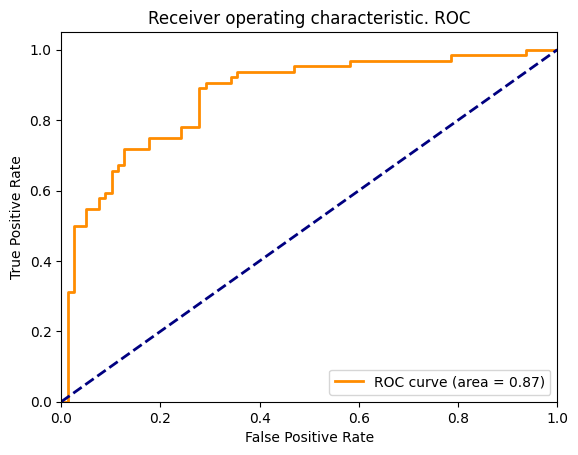

In [6]:
#------------------------------------SVM----------------------------------------

#SVM https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
kernels=['linear', 'poly', 'rbf', 'sigmoid']
Kernel=3
msv = svm.SVC(kernel=kernels[Kernel],gamma='auto', random_state=895)

msv.fit(X_train,Y_train.to_numpy().ravel())

Y_test_predicted_LR = msv.predict(X_test)
Y_test_scores_LR = msv.decision_function(X_test)



MCC = matthews_corrcoef(Y_test, Y_test_predicted_LR)
print("\n","matthews_corrcoef: ", MCC,"\n")
ACC = accuracy_score(Y_test, Y_test_predicted_LR)
print("Accuracy: ", ACC,"\n")

fpr,tpr,thresholds = roc_curve(Y_test.to_numpy().ravel(), Y_test_scores_LR)
roc_auc=roc_auc_score(Y_test.to_numpy().ravel(), Y_test_scores_LR)
plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()



 Para i = 1 ; 

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.77


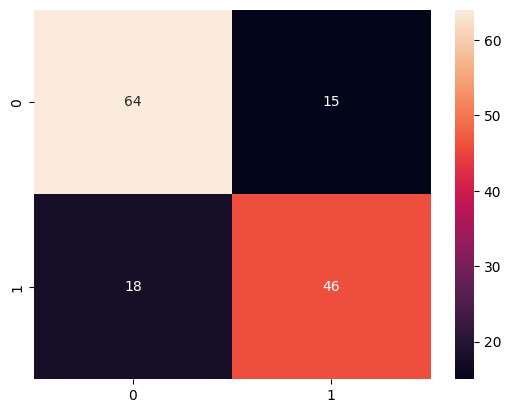


 Para i = 2 ; 

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.78


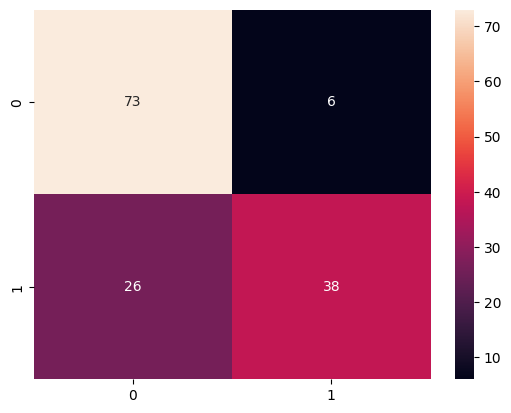


 Para i = 3 ; 

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.77


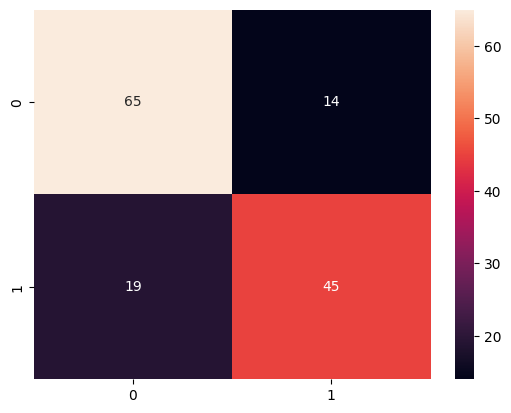


 Para i = 4 ; 

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.82


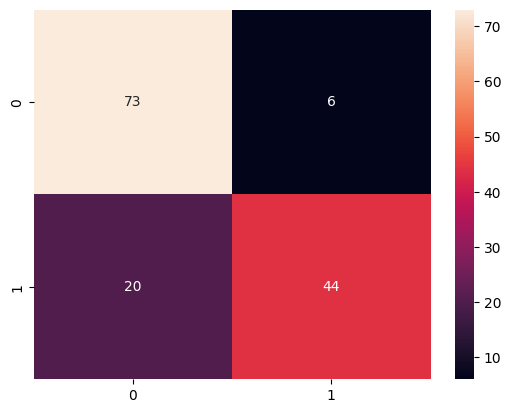


 Para i = 5 ; 

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.79


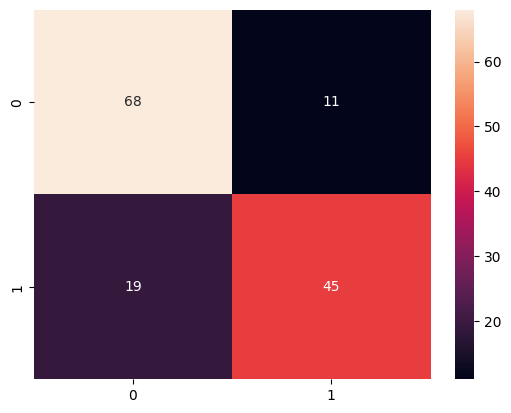


 Para i = 6 ; 

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.81


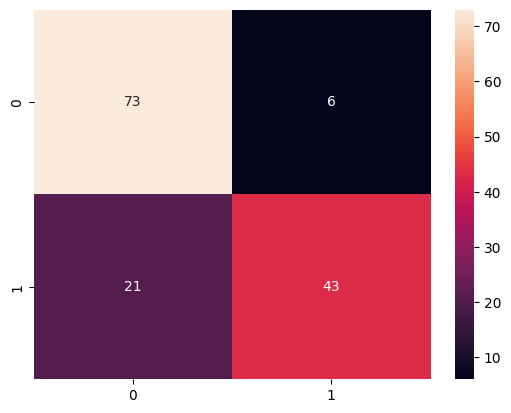


 Para i = 7 ; 

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.79


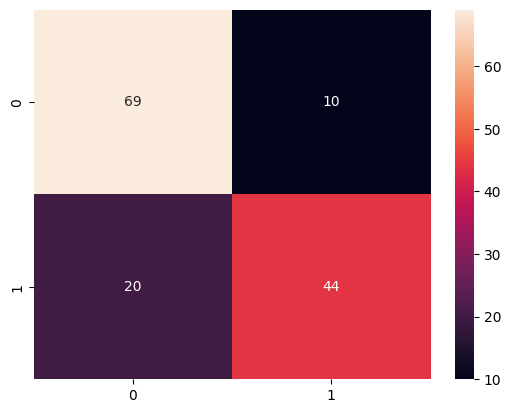


 Para i = 8 ; 

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.80


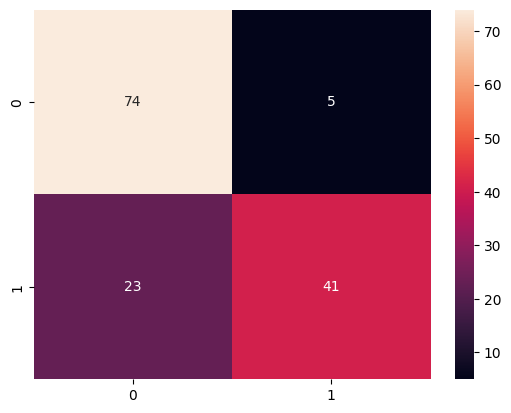


 Para i = 9 ; 

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.81


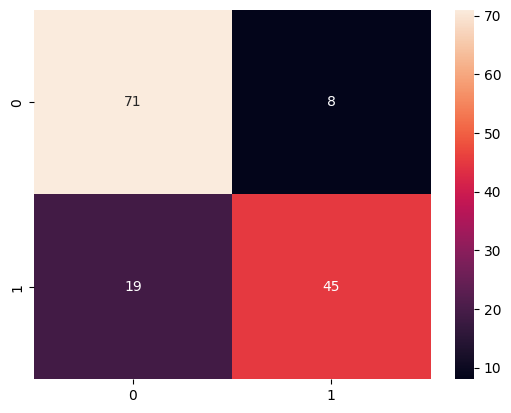

In [7]:
#------------------------------------KNN----------------------------------------
# Iterando 25 veces, cambiando el número de vecinos... (El mejor es el n_neighbors = 5)

for i in range (1,10):
  n_neighbors = i
  # ver https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
  #por ejemplo euclidean. manhattan. chebyshev. minkowski. wminkowski. seuclidean. mahalanobis. hamming

  distance='euclidean'
  print("\n", "Para i =", i, "; \n")
  knn = KNeighborsClassifier(n_neighbors,weights='uniform',metric=distance, metric_params=None,algorithm='auto')
  knn.fit(X_train, Y_train.to_numpy().ravel())
  print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, Y_train.to_numpy().ravel())))
  print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, Y_test)))

  cm=confusion_matrix(Y_test,knn.predict(X_test))
  sns.heatmap(cm,annot=True,fmt='d')
  plt.show()



In [8]:
#--------------------------------REG LOG----------------------------------------
print("Regresión logística")
LR = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5, max_iter=1000, C=10000,random_state=0)
LR.fit(X_train, Y_train.to_numpy().ravel())
Acc=LR.score(X_train, Y_train.to_numpy().ravel())
print( "\n", "Accuracy LR:", Acc, "\n")

Regresión logística

 Accuracy LR: 0.7968476357267951 



6. Seleccione su mejor método de los 3.

In [9]:
# El mejor método fue KNN


7. Re-entrene este mejor método y entrene usando el 100% de las muestras.

8. Use el conjunto de evaluación sin etiquetar de (https://www.kaggle.com/c/titanic).

In [10]:
test0 = pd.read_csv("test.csv", sep=",") # Importar los datos
# Se eliminan las columnas de Ticket y Cabinas (tienen muchos valores nulos y no)
test = test0.drop(['Ticket', 'Cabin','Name', 'Embarked'], axis=1)


test.isnull().sum() #Se mira cuales columnas les falta datos


age_test=pd.DataFrame(test['Age'])
age_test=age_test.dropna()
m=age_test.median()
test=test.fillna(m)


fare_test=pd.DataFrame(test['Fare'])
fare_test=fare_test.dropna()
mf=fare_test.median()
test1=test.fillna(mf)


print("- Las nuevas dimensiones del conjunto de datos son: ",test.shape, "\n", test,'\n')

#Se procede a cambiar las variables
test1.loc[test['Sex'] == 'male', 'Sex'] = '1'
test1.loc[test['Sex'] == 'female', 'Sex'] = '0'

Xt = pd.DataFrame(test1, columns = ['Sex','Pclass','Age','Fare', 'Parch','SibSp'])

scaler = MinMaxScaler()
scaler.fit(Xt)

XT = scaler.transform(Xt)
print(XT, XT.shape)


pca = decomposition.PCA(n_components=6,whiten=True,svd_solver='auto')
pca.fit(XT)
XT = pca.transform(XT)

print("\n","Pesos de PCA:",pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_), "No es necesario hacer reducción dimensional", "\n")


n_neighbors = 6
# ver https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
#por ejemplo euclidean. manhattan. chebyshev. minkowski. wminkowski. seuclidean. mahalanobis. hamming

distance='euclidean'
knn = KNeighborsClassifier(n_neighbors,weights='uniform',metric=distance, metric_params=None,algorithm='auto')
knn.fit(X, Y.to_numpy().ravel())




Y_predict = knn.predict(XT)
print(Y_predict, "\n")

PassID = pd.Series(test0['PassengerId'])

Y_pred = pd.Series(Y_predict)


Submission=pd.concat({'PassengerId':PassID,'Survived':Y_pred},axis=1)

Submission.to_csv('Submission.csv', index=False)

- Las nuevas dimensiones del conjunto de datos son:  (418, 7) 
      PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare
0            892       3    male  34.5      0      0    7.8292
1            893       3  female  47.0      1      0    7.0000
2            894       2    male  62.0      0      0    9.6875
3            895       3    male  27.0      0      0    8.6625
4            896       3  female  22.0      1      1   12.2875
..           ...     ...     ...   ...    ...    ...       ...
413         1305       3    male  27.0      0      0    8.0500
414         1306       1  female  39.0      0      0  108.9000
415         1307       3    male  38.5      0      0    7.2500
416         1308       3    male  27.0      0      0    8.0500
417         1309       3    male  27.0      1      1   22.3583

[418 rows x 7 columns] 

[[1.         1.         0.4527232  0.01528158 0.         0.        ]
 [0.         1.         0.61756561 0.01366309 0.         0.125     ]
 [1.         0.5


9. Someta el resultado de este método a evaluación por parte de Kaggle. pegue en el pdf de entrega los resultados obtenidos.

RESULTADO:

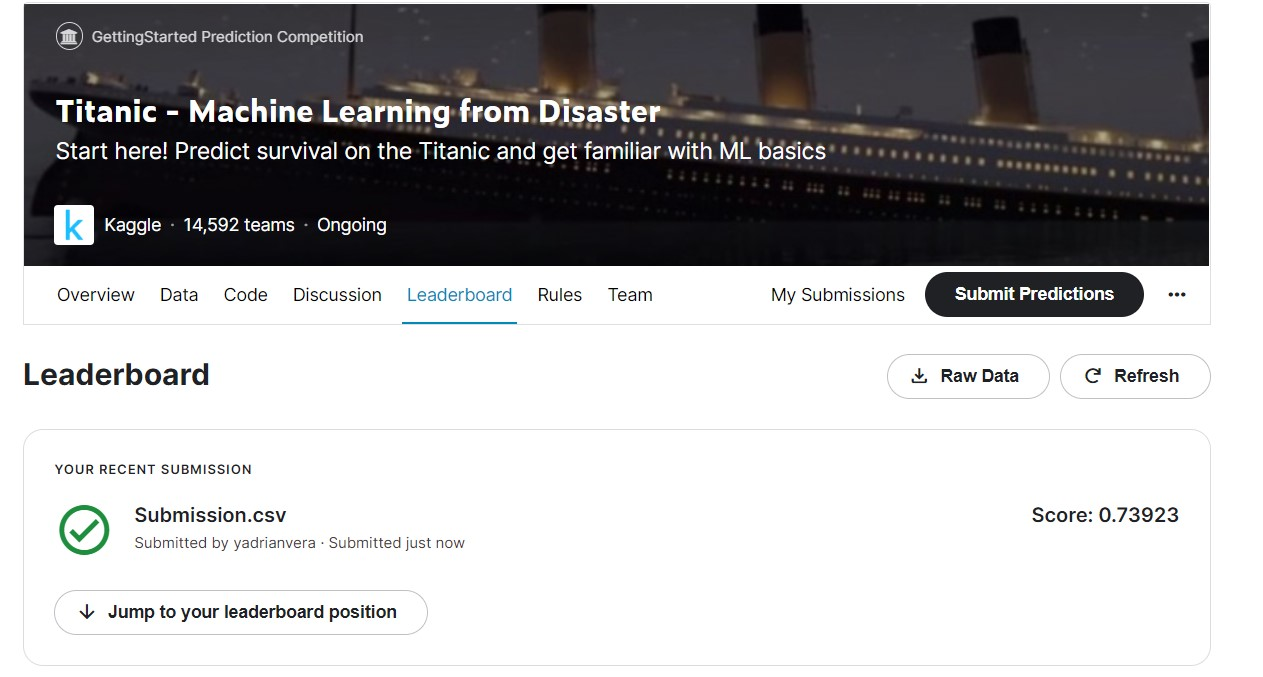